In [ ]:
from matplotlib import pyplot
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X,Y=make_moons(n_samples=100,noise=0.2,random_state=1)
n_train=30
trainX,testX=X[:n_train,:],X[n_train:]
trainY,testY=Y[:n_train],Y[n_train:]

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(30, 2)
(30,)
(70, 2)
(70,)


In [ ]:
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               1500      
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6618 - accuracy: 0.8667 - val_loss: 0.6604 - val_accuracy: 0.7143
Epoch 2/100
1/1 [==============================] - 0s 99ms/step - loss: 0.6462 - accuracy: 0.9000 - val_loss: 0.6505 - val_accuracy: 0.7286
Epoch 3/100
1/1 [==============================] - 0s 127ms/step - loss: 0.6310 - accuracy: 0.9000 - val_loss: 0.6409 - val_accuracy: 0.7143
Epoch 4/100
1/1 [==============================] - 0s 126ms/step - loss: 0.6162 - accuracy: 0.8667 - val_loss: 0.6317 - val_accuracy: 0.7143
Epoch 5/100
1/1 [==============================] - 0s 118ms/step - loss: 0.6018 - accuracy: 0.8667 - val_loss: 0.6228 - val_accuracy: 0.7143
Epoch 6/100
1/1 [==============================] - 0s 106ms/step - loss: 0.5878 - accuracy: 0.8667 - val_loss: 0.6143 - val_accuracy: 0.7143
Epoch 7/100
1/1 [==============================] - 0s 82ms/step - loss: 0.5742 - accuracy: 0.8667 - val_loss: 0.6061 - val_accuracy: 0.7143
Epoch 8/100
1/1 [=

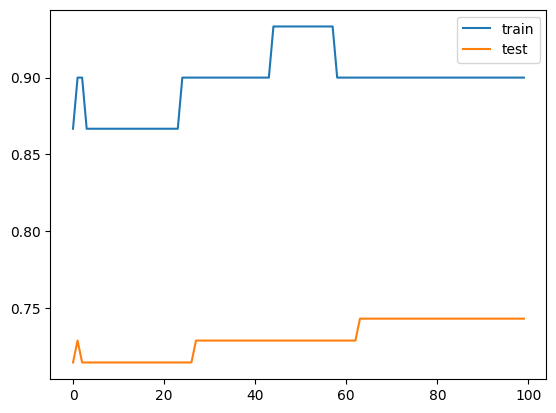

In [ ]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)

pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# After 75 epochs it started overfitting by giving same validation accuracy on the test data, so let us use regularization technique
from keras.regularizers import l2

model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 500)               1500      
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.7060 - accuracy: 0.4333 - val_loss: 0.6984 - val_accuracy: 0.4000
Epoch 2/100
1/1 [==============================] - 0s 76ms/step - loss: 0.6897 - accuracy: 0.6333 - val_loss: 0.6878 - val_accuracy: 0.6000
Epoch 3/100
1/1 [==============================] - 0s 65ms/step - loss: 0.6738 - accuracy: 0.8333 - val_loss: 0.6776 - val_accuracy: 0.6714
Epoch 4/100
1/1 [==============================] - 0s 85ms/step - loss: 0.6584 - accuracy: 0.8333 - val_loss: 0.6677 - val_accuracy: 0.6714
Epoch 5/100
1/1 [==============================] - 0s 55ms/step - loss: 0.6434 - accuracy: 0.8333 - val_loss: 0.6581 - val_accuracy: 0.6857
Epoch 6/100
1/1 [==============================] - 0s 55ms/step - loss: 0.6288 - accuracy: 0.8333 - val_loss: 0.6488 - val_accuracy: 0.6857
Epoch 7/100
1/1 [==============================] - 0s 43ms/step - loss: 0.6147 - accuracy: 0.8333 - val_loss: 0.6399 - val_accuracy: 0.6857
Epoch 8/100
1/1 [=====

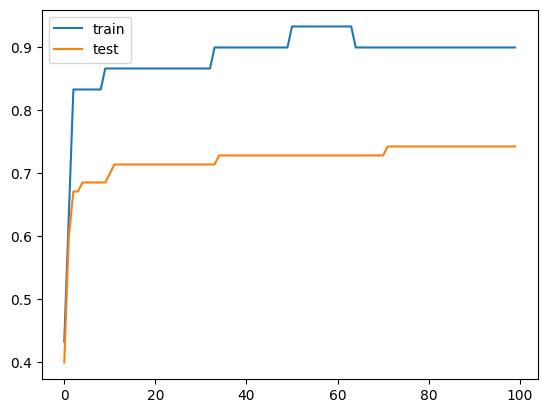

In [ ]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)

pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from keras.regularizers import l1_l2

model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer=l1_l2(l1=0.001,l2=0.001)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               1500      
                                                                 
 dense_5 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7581 - accuracy: 0.4667 - val_loss: 0.7515 - val_accuracy: 0.4857
Epoch 2/100
1/1 [==============================] - 0s 90ms/step - loss: 0.7419 - accuracy: 0.5333 - val_loss: 0.7410 - val_accuracy: 0.5857
Epoch 3/100
1/1 [==============================] - 0s 84ms/step - loss: 0.7261 - accuracy: 0.8000 - val_loss: 0.7308 - val_accuracy: 0.6143
Epoch 4/100
1/1 [==============================] - 0s 63ms/step - loss: 0.7108 - accuracy: 0.8000 - val_loss: 0.7211 - val_accuracy: 0.6143
Epoch 5/100
1/1 [==============================] - 0s 72ms/step - loss: 0.6960 - accuracy: 0.8667 - val_loss: 0.7117 - val_accuracy: 0.6429
Epoch 6/100
1/1 [==============================] - 0s 114ms/step - loss: 0.6816 - accuracy: 0.8667 - val_loss: 0.7027 - val_accuracy: 0.6714
Epoch 7/100
1/1 [==============================] - 0s 92ms/step - loss: 0.6676 - accuracy: 0.8333 - val_loss: 0.6941 - val_accuracy: 0.6857
Epoch 8/100
1/1 [====

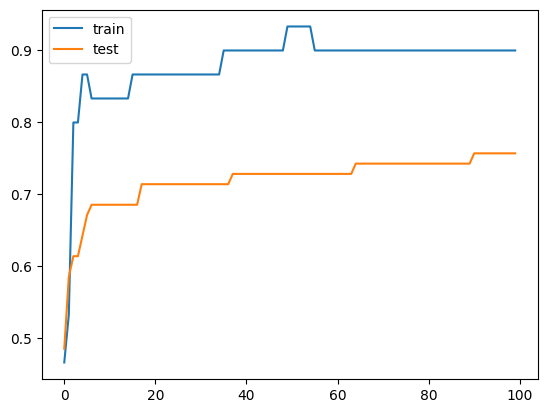

In [ ]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)

pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()